In [72]:
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials
import random
from sklearn.preprocessing import StandardScaler
import config
import time
import numpy as np

In [48]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.CLIENT_ID,
                                                           client_secret= config.CLIENT_SECRET))

In [49]:
hot_100_songs = ["A Bar Song (Tipsy)", "Midnight Memories", "Echoes of Yesterday", "Sunset Boulevard", "Heartbeat City", "Neon Dreams", "Lost in Translation", "Electric Feelings", "City Lights", "Moonlit Dance", "Starlight Serenade", "Whispers in the Dark", "Golden Hour", "Chasing Shadows", "Velvet Sky", "Crystal Clear", "Ocean Eyes", "Desert Rose", "Northern Lights", "Southern Comfort", "Eastern Sunrise", "Western Wind", "Mountain High", "Valley Low", "River Flow", "Forest Whisper", "Desert Mirage", "Island Breeze", "Tropical Rain", "Arctic Chill", "Savannah Heat", "Prairie Dawn", "Canyon Echo", "Harbor Lights", "Lighthouse Glow", "Seaside Serenade", "Harbor Nights", "Coastal Dreams", "Bayou Blues", "Delta Dawn", "Everglade Echoes", "Swamp Song", "Marshland Melody", "Wetland Whispers", "Rainforest Rhythm", "Jungle Jam", "Safari Sunset", "Savanna Serenade", "Outback Oasis", "Tundra Twilight", "Taiga Tune", "Steppe Song", "Plateau Pulse", "Mesa Melody", "Butte Beat", "Cliffside Chorus", "Cave Chant", "Grotto Groove", "Cavernous Cadence", "Underground Uplift", "Subterranean Swing", "Mineshaft Melody", "Quarry Quartet", "Pitfall Prelude", "Abyss Anthem", "Trench Tune", "Rift Rhapsody", "Chasm Chant", "Gorge Groove", "Canyon Call", "Valley Verse", "Dale Ditty", "Hollow Hymn", "Glen Groove", "Dell Dance", "Nook Note", "Cranny Chorus", "Alcove Anthem", "Recess Rhythm", "Corner Cadence", "Pocket Pulse", "Pouch Prelude", "Satchel Song", "Bagpipe Beat", "Sack Serenade", "Bundle Ballad", "Parcel Prelude", "Package Pulse", "Packet Poem", "Envelope Echo", "Letter Lullaby", "Note Number", "Message Melody", "Telegram Tune", "Dispatch Ditty", "Missive Melody", "Epistle Echo", "Correspondence Chorus", "Memo Melody", "Bulletin Beat", "Circular Chorus", "Flyer Fanfare", "Brochure Ballad", "Pamphlet Prelude", "Leaflet Lullaby", "Handbill Harmony", "Poster Pulse", "Placard Poem", "Billboard Ballad"]

In [50]:
def get_recommendation():
    user_input = input("Please input a song:")
    if user_input in hot_100_songs:
        print("Your song is one of the hot songs!")
        rng = random.randint(0, (len(hot_100_songs)-1))
        recommendation = hot_100_songs[rng]
        print(f"Here is another hot song! {recommendation}")
    else:
        print("We are sorry, but your song is not hot enough to be one of the 100 HOT SONGS!")

In [51]:
get_recommendation()

Please input a song: a


We are sorry, but your song is not hot enough to be one of the 100 HOT SONGS!


___________________________

In [52]:
## Fetching features_df

data = pd.read_csv('data/features_df.csv')

In [53]:
#datasets.load_wine(as_frame=True)["data"]

In [54]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [55]:
data.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.812,0.516,9,-6.963,1,0.2240,0.000369,0.000011,0.0991,0.633,127.498,audio_features,0LSLM0zuWRkEYemF7JcfEE,spotify:track:0LSLM0zuWRkEYemF7JcfEE,https://api.spotify.com/v1/tracks/0LSLM0zuWRkE...,https://api.spotify.com/v1/audio-analysis/0LSL...,284280,4
1,0.605,0.724,1,-7.729,0,0.0441,0.121000,0.431000,0.1080,0.898,89.403,audio_features,0a0EYuSVqeVqV8kjN9bFYC,spotify:track:0a0EYuSVqeVqV8kjN9bFYC,https://api.spotify.com/v1/tracks/0a0EYuSVqeVq...,https://api.spotify.com/v1/audio-analysis/0a0E...,226613,4


In [56]:
X = data

In [57]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,0.635700,0.631243,5.257000,-8.674071,0.656000,0.116245,0.258207,0.222379,0.193127,0.513064,121.515568,2.087261e+05,3.945000
std,0.165458,0.247472,3.622993,5.651131,0.475279,0.122346,0.317879,0.359335,0.166590,0.253387,29.132269,1.425620e+05,0.343647
min,0.079100,0.004640,0.000000,-38.311000,0.000000,0.024300,0.000002,0.000000,0.014200,0.026500,48.948000,3.100000e+04,1.000000
25%,0.531750,0.478750,2.000000,-10.207500,0.000000,0.039300,0.016475,0.000000,0.094800,0.309000,97.989000,1.568098e+05,4.000000
50%,0.651000,0.663000,5.000000,-7.225000,1.000000,0.060550,0.099350,0.000119,0.120000,0.519500,121.861500,1.976270e+05,4.000000
75%,0.763250,0.835000,8.000000,-5.286750,1.000000,0.144000,0.425250,0.434750,0.240250,0.706250,140.014250,2.380925e+05,4.000000
max,0.988000,1.000000,11.000000,2.674000,1.000000,0.932000,0.996000,0.991000,0.975000,0.984000,215.129000,3.600014e+06,5.000000


In [58]:
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_columns]

In [59]:
scaler = StandardScaler()
scaler.fit(X_numeric)
X_scaled = scaler.transform(X_numeric)
X_scaled_df = pd.DataFrame(X_scaled, columns = X_numeric.columns)
#display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.066062,-0.465914,1.033641,0.302935,0.724148,0.881176,-0.811526,-0.619141,-0.564701,0.473567,0.205457,0.530237,0.160128
1,-0.185639,0.375005,-1.175583,0.167319,-1.380933,-0.589975,-0.431849,0.580865,-0.511250,1.519920,-1.102854,0.125531,0.160128
2,1.289796,0.783336,-0.899430,0.561243,0.724148,-0.543362,-0.679552,-0.517266,-0.283031,0.212966,0.156449,-0.475638,0.160128
3,-0.663342,1.418068,0.481335,0.097564,0.724148,-0.544998,-0.808344,0.706159,2.695831,0.524898,0.425083,-0.020816,0.160128
4,-0.240061,1.199752,1.033641,0.363130,0.724148,-0.431329,-0.636117,1.430079,0.161396,0.197172,0.155522,-0.388749,0.160128


In [60]:
X_scaled_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [61]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,7.815970e-17,4.263256e-17,7.993606e-17,-7.105427e-17,-9.237056e-17,6.483702e-17,2.273737e-16,4.263256e-17,-2.096101e-16,1.350031e-16,-5.684342e-17,-8.881784e-17,5.284662e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.365688e+00,-2.533281e+00,-1.451736e+00,-5.247048e+00,-1.380933e+00,-7.518911e-01,-8.126817e-01,-6.191715e-01,-1.074591e+00,-1.921198e+00,-2.492215e+00,-1.247281e+00,-8.574135e+00
25%,-6.285726e-01,-6.165113e-01,-8.994304e-01,-2.714848e-01,-1.380933e+00,-6.292271e-01,-7.608340e-01,-6.191715e-01,-5.905262e-01,-8.057468e-01,-8.079817e-01,-3.643487e-01,1.601282e-01
50%,9.251649e-02,1.283893e-01,-7.097132e-02,2.565497e-01,7.241479e-01,-4.554531e-01,-4.999909e-01,-6.188402e-01,-4.391809e-01,2.541255e-02,1.188047e-02,-7.789323e-02,1.601282e-01
75%,7.712775e-01,8.237646e-01,7.574877e-01,5.997058e-01,7.241479e-01,2.269677e-01,5.257560e-01,5.913065e-01,2.830129e-01,7.627951e-01,6.353071e-01,2.060936e-01,1.601282e-01
max,2.130311e+00,1.490840e+00,1.585947e+00,2.009111e+00,7.241479e-01,6.670917e+00,2.322151e+00,2.140078e+00,4.695752e+00,1.859491e+00,3.215001e+00,2.380006e+01,3.071549e+00


_____________

In [62]:
#### We should find out how many CLUSTERs we should have. Lets use LE KNEE for this

In [63]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

In [64]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [65]:
rng_list = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']

In [66]:
def random_caller(list):
    return list[random.randint(0, (len(rng_list)-1))]

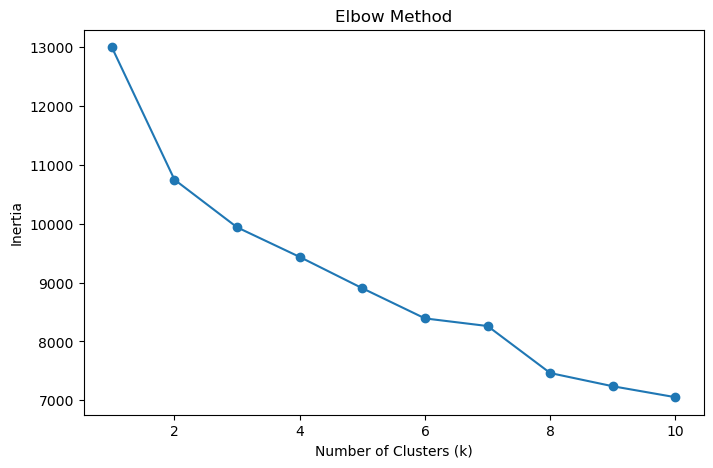

In [67]:
# Step 1: Select the features for clustering
beta_X = X_scaled_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']]

# Step 2: Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)  # Test cluster numbers from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(beta_X)
    inertia.append(kmeans.inertia_)

# Step 3: Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Step 4: Apply K-Means with the optimal number of clusters
optimal_k = 6  # Replace this with the number determined from the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_scaled_df['Cluster'] = kmeans.fit_predict(beta_X)

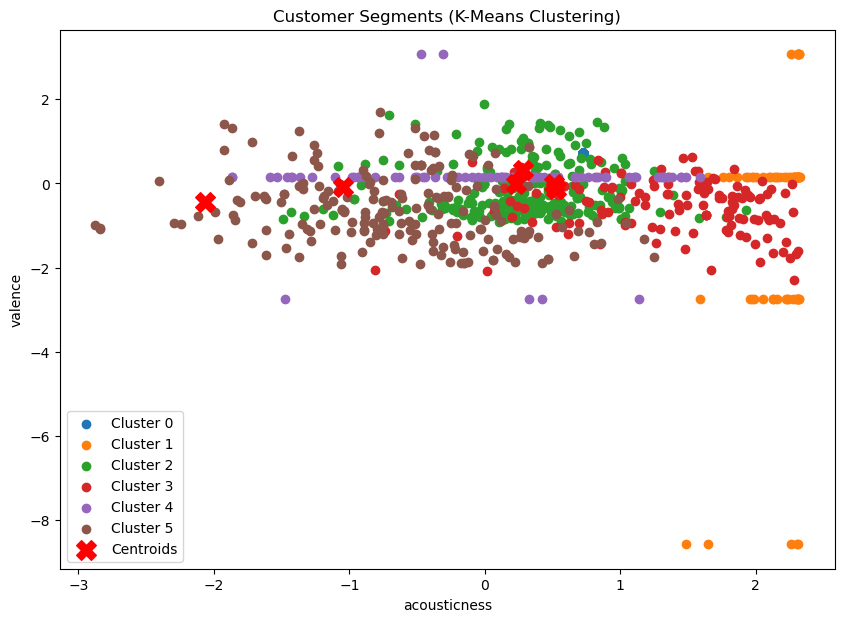

In [68]:
# Step 5: Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_df = beta_X[X_scaled_df['Cluster'] == cluster]
    plt.scatter(cluster_df[random_caller(rng_list)], cluster_df[random_caller(rng_list)], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', label='Centroids', marker='X')
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel(random_caller(rng_list))
plt.ylabel(random_caller(rng_list))
plt.legend()
plt.show()

____________________________________________

In [69]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=6, random_state=1234)

In [70]:
labels = kmeans.labels_
labels

array([5, 2, 3, 0, 0, 5, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 5, 3, 4, 0,
       2, 4, 5, 4, 0, 0, 0, 2, 4, 5, 2, 3, 0, 3, 0, 2, 1, 0, 0, 3, 0, 2,
       0, 0, 4, 0, 0, 4, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 5, 5, 2, 2, 4, 0,
       0, 2, 0, 3, 2, 0, 3, 5, 5, 0, 4, 2, 4, 4, 2, 0, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 5, 0, 3, 0, 3, 2, 0, 0, 5, 2, 5, 3, 1, 2, 2, 5, 2, 0, 2,
       2, 3, 2, 2, 2, 0, 0, 2, 0, 0, 5, 0, 3, 3, 2, 2, 5, 0, 2, 2, 0, 0,
       0, 2, 2, 3, 1, 4, 0, 5, 2, 2, 0, 2, 2, 5, 0, 2, 1, 4, 2, 5, 0, 2,
       0, 4, 5, 2, 0, 0, 0, 3, 2, 0, 4, 5, 0, 1, 4, 5, 2, 2, 2, 0, 0, 4,
       0, 2, 2, 1, 1, 2, 2, 5, 4, 3, 5, 2, 4, 5, 4, 0, 1, 3, 2, 0, 4, 0,
       4, 0, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 5, 4, 5, 3,
       2, 0, 2, 4, 4, 2, 2, 0, 4, 4, 0, 4, 0, 5, 4, 0, 4, 3, 4, 0, 3, 4,
       5, 0, 0, 2, 5, 0, 0, 4, 0, 0, 3, 2, 5, 2, 2, 5, 0, 4, 2, 5, 2, 2,
       5, 2, 3, 0, 5, 0, 3, 1, 4, 0, 5, 1, 4, 0, 0, 0, 5, 2, 4, 1, 5, 2,
       2, 0, 4, 4, 0, 2, 2, 4, 0, 4, 2, 2, 2, 0, 3,

In [73]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5])

In [74]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    275
1     69
2    257
3    117
4    136
5    146
Name: count, dtype: int64

In [75]:
clusters

array([5, 2, 3, 0, 0, 5, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 5, 3, 4, 0,
       2, 4, 5, 4, 0, 0, 0, 2, 4, 5, 2, 3, 0, 3, 0, 2, 1, 0, 0, 3, 0, 2,
       0, 0, 4, 0, 0, 4, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 5, 5, 2, 2, 4, 0,
       0, 2, 0, 3, 2, 0, 3, 5, 5, 0, 4, 2, 4, 4, 2, 0, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 5, 0, 3, 0, 3, 2, 0, 0, 5, 2, 5, 3, 1, 2, 2, 5, 2, 0, 2,
       2, 3, 2, 2, 2, 0, 0, 2, 0, 0, 5, 0, 3, 3, 2, 2, 5, 0, 2, 2, 0, 0,
       0, 2, 2, 3, 1, 4, 0, 5, 2, 2, 0, 2, 2, 5, 0, 2, 1, 4, 2, 5, 0, 2,
       0, 4, 5, 2, 0, 0, 0, 3, 2, 0, 4, 5, 0, 1, 4, 5, 2, 2, 2, 0, 0, 4,
       0, 2, 2, 1, 1, 2, 2, 5, 4, 3, 5, 2, 4, 5, 4, 0, 1, 3, 2, 0, 4, 0,
       4, 0, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 5, 4, 5, 3,
       2, 0, 2, 4, 4, 2, 2, 0, 4, 4, 0, 4, 0, 5, 4, 0, 4, 3, 4, 0, 3, 4,
       5, 0, 0, 2, 5, 0, 0, 4, 0, 0, 3, 2, 5, 2, 2, 5, 0, 4, 2, 5, 2, 2,
       5, 2, 3, 0, 5, 0, 3, 1, 4, 0, 5, 1, 4, 0, 0, 0, 5, 2, 4, 1, 5, 2,
       2, 0, 4, 4, 0, 2, 2, 4, 0, 4, 2, 2, 2, 0, 3,

In [76]:
labels

array([5, 2, 3, 0, 0, 5, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 5, 3, 4, 0,
       2, 4, 5, 4, 0, 0, 0, 2, 4, 5, 2, 3, 0, 3, 0, 2, 1, 0, 0, 3, 0, 2,
       0, 0, 4, 0, 0, 4, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 5, 5, 2, 2, 4, 0,
       0, 2, 0, 3, 2, 0, 3, 5, 5, 0, 4, 2, 4, 4, 2, 0, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 5, 0, 3, 0, 3, 2, 0, 0, 5, 2, 5, 3, 1, 2, 2, 5, 2, 0, 2,
       2, 3, 2, 2, 2, 0, 0, 2, 0, 0, 5, 0, 3, 3, 2, 2, 5, 0, 2, 2, 0, 0,
       0, 2, 2, 3, 1, 4, 0, 5, 2, 2, 0, 2, 2, 5, 0, 2, 1, 4, 2, 5, 0, 2,
       0, 4, 5, 2, 0, 0, 0, 3, 2, 0, 4, 5, 0, 1, 4, 5, 2, 2, 2, 0, 0, 4,
       0, 2, 2, 1, 1, 2, 2, 5, 4, 3, 5, 2, 4, 5, 4, 0, 1, 3, 2, 0, 4, 0,
       4, 0, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 5, 4, 5, 3,
       2, 0, 2, 4, 4, 2, 2, 0, 4, 4, 0, 4, 0, 5, 4, 0, 4, 3, 4, 0, 3, 4,
       5, 0, 0, 2, 5, 0, 0, 4, 0, 0, 3, 2, 5, 2, 2, 5, 0, 4, 2, 5, 2, 2,
       5, 2, 3, 0, 5, 0, 3, 1, 4, 0, 5, 1, 4, 0, 0, 0, 5, 2, 4, 1, 5, 2,
       2, 0, 4, 4, 0, 2, 2, 4, 0, 4, 2, 2, 2, 0, 3,

In [79]:
#X_df = pd.DataFrame(X)
X_scaled_df["cluster"] = clusters
X_scaled_df.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Cluster,cluster
0,1.066062,-0.465914,1.033641,0.302935,0.724148,0.881176,-0.811526,-0.619141,-0.564701,0.473567,0.205457,0.530237,0.160128,0,5
1,-0.185639,0.375005,-1.175583,0.167319,-1.380933,-0.589975,-0.431849,0.580865,-0.511250,1.519920,-1.102854,0.125531,0.160128,2,2


In [80]:
random_song = X_scaled_df.sample()

In [82]:
random_song

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Cluster,cluster
532,-0.51217,0.74695,-0.623277,0.461921,-1.380933,1.61716,0.298354,-0.511976,0.089327,0.560434,-1.145783,-0.560079,0.160128,2,2


In [83]:
kmeans.predict(random_song)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- cluster
